# Handwritten digits classification using TensorFlow

Putting all the concepts we have learned so far, we will see how can use tensorflow to
build a neural network to recognize handwritten digits. If you are playing around deep
learning off late then you must have come across MNIST dataset. It is being called the hello
world of deep learning.

It consists of 55,000 data points of handwritten digits (0 to 9).
In this section, we will see how can we use our neural network to recognize the
handwritten digits and also we will get hang of tensorflow and tensorboard.


## Import required libraries

As a first step, let us import all the required libraries:

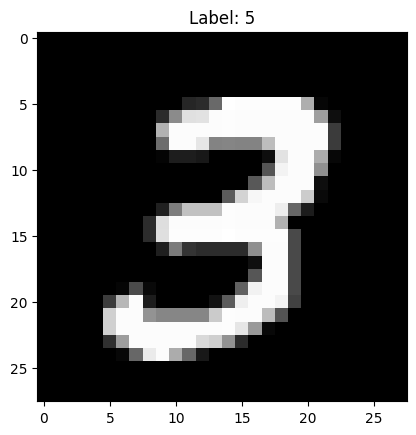

In [88]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display the first image in the training data
plt.imshow(x_train[7], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


In [4]:
import tensorflow as tf

# Print TensorFlow version
print(tf.__version__)


2.16.1


## Load the Dataset

In the below code, "data/mnist" implies the location where we store the MNIST dataset.
one_hot=True implies we are one-hot encoding the labels (0 to 9):

In [89]:

mnist = tf.keras.datasets.mnist


Let's check what we got in our data:

In [90]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding if needed
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)


# Print the number of images and labels in the training and test sets
print("Number of images in training set: {}".format(x_train.shape[0]))
print("Number of labels in training set: {}".format(y_train.shape[0]))

print("Number of images in test set: {}".format(x_test.shape[0]))
print("Number of labels in test set: {}".format(y_test.shape[0]))

Number of images in training set: 60000
Number of labels in training set: 60000
Number of images in test set: 10000
Number of labels in test set: 10000


We have 55,000 images in the training set and each image is of size 784 and we have 10 labels which are actually 0 to 9. Similarly, we have 10000 images in the test set.

Now we plot one image to see how it looks like:

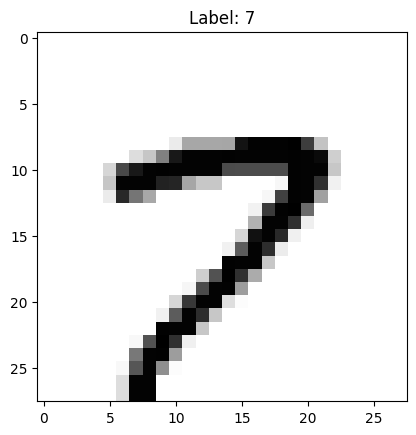

In [96]:
img1 = x_train[123].reshape(28, 28)
#reshape(28, 28) reshapes the 1-dimensional array representing the image into a 2-dimensional (28x28) array. 
# This is necessary because the images in MNIST dataset are flattened into 1D arrays (784 pixels).
plt.imshow(img1, cmap='Greys')
#cmap='Greys' specifies the colormap to use for displaying the image. 'Greys' colormap displays the image in grayscale.
plt.title(f"Label: {y_train[123]}")
plt.show()

## Define the number of neurons in each layer

We build a 4 layer neural network with 3 hidden layers and 1 output layer. As the size of
the input image is 784. We set the num_input to 784 and since we have 10 handwritten
digits (0 to 9), We set 10 neurons in the output layer. We define the number of neurons in
each layer as follows,
Hidden Layers: Perform computations to transform the input data into a format that makes it easier for the network to learn patterns and relationships in the data.
Output Layer: Produces the final predictions or classifications for the input data.
## Training Context:
During training, the neural network adjusts the weights and biases of each neuron through an optimization process (e.g., using gradient descent and backpropagation). The goal is to minimize a defined loss function (like cross-entropy in classification tasks) and improve the accuracy of predictions on the training data.
The specified architecture (number of layers and neurons) influences the capacity of the model to learn complex patterns in the data. Deeper networks with more neurons can potentially capture more intricate relationships but require more computational resources and may be prone to overfitting if not properly regularized.
## Summary:
In summary, specifying the number of neurons in each layer defines the architecture of a neural network model. Each layer's configuration influences how the model processes and learns from the input data, leading to the model's ability to generalize and make accurate predictions on unseen data during training and evaluation phases. Adjusting these parameters involves balancing model complexity, computational efficiency, and performance metrics such as accuracy and loss.

In [50]:
#number of neurons in input layer
num_input = 784

#number of neurons in hidden layer 1
num_hidden1 = 256

#number of neurons in hidden layer 2
num_hidden2 = 128

#number of neurons in hidden layer 3
num_hidden3 = 64

#number of neurons in output layer
num_output = 10

## Defining placeholders

As we learned, we first need to define the placeholders for input and output. Values for
the placeholders will be feed at the run time through feed_dict:

In [93]:
with tf.name_scope('input'):
    X = tf.keras.Input(shape=(num_input,), name='X')

with tf.name_scope('output'):
    Y = tf.keras.Input(shape=(num_output,), name='Y')

Since we have a 4 layer network, we have 4 weights and 4 baises. We initialize our weights
by drawing values from the truncated normal distribution with a standard deviation of
0.1.

Remember, the dimensions of the weights matrix should be a number of neurons in the
previous layer x number of neurons in the current layer. For instance, the dimension of
weight matrix w3 should be the number of neurons in the hidden layer 2 x number of
neurons in hidden layer 3.

We often define all the weights in a dictionary as given below:

In [97]:
with tf.name_scope('weights'):
    weights = {
        'w1': tf.Variable(tf.random.truncated_normal([num_input, num_hidden1], stddev=0.1), name='weight_1'),
        'w2': tf.Variable(tf.random.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), name='weight_2'),
        'w3': tf.Variable(tf.random.truncated_normal([num_hidden2, num_hidden3], stddev=0.1), name='weight_3'),
        'out': tf.Variable(tf.random.truncated_normal([num_hidden3, num_output], stddev=0.1), name='weight_4'),
    }

print(weights)


{'w1': <tf.Variable 'weights/weight_1:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.13870959, -0.00242143,  0.00517468, ...,  0.01481961,
         0.07392079, -0.10576802],
       [-0.12054098,  0.02266666, -0.0879983 , ..., -0.03884495,
        -0.08364286, -0.01373245],
       [-0.03664012,  0.05212152,  0.1895711 , ..., -0.0199808 ,
         0.00305892, -0.02154767],
       ...,
       [-0.03455305,  0.11476151, -0.08022871, ...,  0.00835049,
        -0.09517063, -0.11122813],
       [-0.11614203,  0.1910951 ,  0.01636261, ..., -0.03500909,
        -0.08445861,  0.04111322],
       [ 0.03114636, -0.01663359,  0.03409574, ..., -0.11403098,
         0.02594852,  0.08080709]], dtype=float32)>, 'w2': <tf.Variable 'weights/weight_2:0' shape=(256, 128) dtype=float32, numpy=
array([[ 0.04894988, -0.10916915, -0.10057712, ..., -0.1264234 ,
        -0.00883793,  0.08549714],
       [ 0.07437675, -0.12402145, -0.00023859, ..., -0.02979183,
         0.01107212, -0.1513773 ],
       [ 0.

The dimension of bias should be a number of neurons in the current layer. For instance, the
dimension of bias b2 is the number of neurons in the hidden layer 2. We set the bias value
as constant 0.1 in all layers:



In [59]:
with tf.name_scope('biases'):

    biases = {
        'b1': tf.Variable(tf.constant(0.1, shape=[num_hidden1]),name='bias_1'),
        'b2': tf.Variable(tf.constant(0.1, shape=[num_hidden2]),name='bias_2'),
        'b3': tf.Variable(tf.constant(0.1, shape=[num_hidden3]),name='bias_3'),
        'out': tf.Variable(tf.constant(0.1, shape=[num_output]),name='bias_4')
    }

## Forward Propagation

Now, we define the forward propagation operation. We use relu activations in all layers
and in the last layer we use sigmoid activation as defined below:

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_hidden1, activation='relu', input_shape=(num_input,), name='layer1'),
    tf.keras.layers.Dense(num_hidden2, activation='relu', name='layer2'),
    tf.keras.layers.Dense(num_hidden3, activation='relu', name='layer3'),
    tf.keras.layers.Dense(num_output, activation='sigmoid', name='output_layer')
])

## Compute Loss and Backpropagate



Next, we define our loss function. We use softmax cross-entropy as our loss
function. Tensorflow
provides tf.nn.softmax_cross_entropy_with_logits() function for computing the
softmax cross entropy loss. It takes the two parameters as inputs logits and labels.

* logits implies the logits predicted by our network. That is, y_hat

* labels imply the actual labels. That is, true labels y


We take mean of the loss using tf.reduce_mean()

In [61]:
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',  # Using categorical crossentropy for multi-class classification
              metrics=['accuracy'])

Now, we need to minimize the loss using backpropagation. Don't worry! We don't have to
calculate derivatives of all the weights manually. Instead, we can use tensorflow's
optimizer. In this section, we use Adam optimizer. It is a variant of gradient descent
optimization technique we learned in the previous chapter. In the next chapter, we will
dive into detail and see how exactly all the Adam and several other optimizers work. For
now, let's say we use Adam optimizer as our backpropagation algorithm,


tf.train.AdamOptimizer() requires the learning rate as input. So we set 1e-4 as the learning rate and we minimize the loss with minimize() function. It computes the gradients and updates the parameters (weights and biases) of our network.

In [56]:
optimizer = tf.keras.optimizers.Adam()

##  Compute Accuracy

We calculate the accuracy of our model as follows.


* y_hat denotes the predicted probability for each class by our model. Since we have 10 classes we will have 10 probabilities. If the probability is high at position 7, then it means that our network predicts the input image as digit 7 with high probability.  tf.argmax() returns the index of the largest value. Thus, tf.argmax(y_hat,1) gives the index where the probability is high. Thus, if the probability is high at index 7, then it returns 7
<br>


* Y denotes the actual labels and it is the one hot encoded values. That is, it consists of zeros everywhere except at the position of the actual image where it consists of 1. For instance, if the input image is 7, then Y has 0 at all indices except at index 7 where it has 1. Thus, tf.argmax(Y,1) returns 7 because that is where we have high value i.e 1.


Thus, tf.armax(y_hat,1) gives the predicted digit and tf.argmax(Y,1) gives us the actual digit.

tf.equal(x, y) takes x and y as inputs and returns the truth value of (x == y) element-wise. Thus, correct_pred = tf.equal(predicted_digit,actual_digit) consists of True where the actual and predicted digits are same and False where the actual and predicted digits are not the same. We convert the boolean values in correct_pred into float using tensorflow's cast operation. That is, tf.cast(correct_pred, tf.float32). After converting into float values, take the average using tf.treduce_mean().

Thus, tf.reduce_mean(tf.cast(correct_pred, tf.float32)) gives us the average correct predictions.

In [72]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import matplotlib.pyplot as plt


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train_flat, y_train, epochs=7, batch_size=32, validation_data=(x_test_flat, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_flat, y_test, verbose=2)
print("\nTest accuracy:", test_acc)


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9937 - loss: 0.0205 - val_accuracy: 0.9799 - val_loss: 0.0886
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9950 - loss: 0.0148 - val_accuracy: 0.9798 - val_loss: 0.0906
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9964 - loss: 0.0126 - val_accuracy: 0.9797 - val_loss: 0.1011
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9783 - val_loss: 0.1143
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9957 - loss: 0.0134 - val_accuracy: 0.9812 - val_loss: 0.0987
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9964 - loss: 0.0122 - val_accuracy: 0.9797 - val_loss: 0.1184
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9968 - loss: 0.0110 - val_accuracy: 0.9790 - val_loss: 0.1047
313/313 - 0s - 1ms/step - accuracy: 0.9790 - loss: 0.1047

Test accuracy: 0.9789999723434448


## Create Summary

We can also visualize how the loss and accuracy of our model change during several
iterations in tensorboard. So, we use tf.summary() to get the summary of the variable.
Since the loss and accuracy are scalar variables, we use tf.summary.scalar() to store the summary as shown below:

In [73]:
def log_metrics(epoch, logs):
    with summary_writer.as_default():
        tf.summary.scalar('Loss', logs['loss'], step=epoch)
        tf.summary.scalar('Accuracy', logs['accuracy'], step=epoch)

Next, we merge all the summaries we use in our graph using tf.summary.merge_all(). We merge all summaries because when we have many summaries running and storing them would become inefficient, so we merge all the summaries and run them once in our session instead of running multiple times.

In [75]:
log_dir = './logs'
summary_writer = tf.summary.create_file_writer(log_dir)

## Train the Model

Now it is time to train our model. As we learned, first we need to initialize all the variables:

In [79]:
import tensorflow as tf

# Example explicit variable initialization
w = tf.Variable(tf.random.normal(shape=(784, 256)), name='weight')
b = tf.Variable(tf.zeros(shape=(256,)), name='bias')

# Explicitly assign initial values (if needed)
w.assign(tf.random.normal(shape=(784, 256)))
b.assign(tf.zeros(shape=(256,)))

# Use variables in a model or computation
x = tf.random.normal(shape=(32, 784))
output = tf.matmul(x, w) + b

print(output)


tf.Tensor(
[[ 17.460217   15.074947  -23.056368  ...   6.1282845 -53.25817
  -32.698906 ]
 [ -7.3741813 -44.68805   -36.866104  ... -11.14521   -34.578873
   25.547768 ]
 [  9.91428     1.9410253  -9.128231  ... -17.878704   -2.4646196
   38.994423 ]
 ...
 [-22.229265   45.167618  -17.548645  ...  13.859132   28.690716
    6.6715083]
 [ 54.546425   -3.9325848   3.0803294 ... -40.231995   16.485685
   20.402626 ]
 [  3.4541411 -55.936886   -6.7378254 ... -18.315048   12.366338
   -3.0935564]], shape=(32, 256), dtype=float32)


Define the batch size and number of iterations:

In [82]:
batch_size_number = 128
num_iterations = 1000

Start the tensorflow session and perform training

In [85]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import TensorBoard
import datetime  # For unique log directory per run

# Set up TensorBoard for logging
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train model using fit method
model.fit(x_train.reshape(-1, 784), y_train, epochs=5, batch_size=batch_size_number,
          validation_data=(x_test.reshape(-1, 784), y_test),
          callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_acc = model.evaluate(x_test.reshape(-1, 784), y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 5.6755e-05 - val_accuracy: 0.9839 - val_loss: 0.0991
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 5.4963e-05 - val_accuracy: 0.9839 - val_loss: 0.1015
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 3.9946e-05 - val_accuracy: 0.9840 - val_loss: 0.1043
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 2.3221e-05 - val_accuracy: 0.9841 - val_loss: 0.1069
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 1.9069e-05 - val_accuracy: 0.9841 - val_loss: 0.1092
313/313 - 0s - 2ms/step - accuracy: 0.9841 - loss: 0.1092
Test accuracy: 0.9840999841690063


As you may observe, the loss decreases and the accuracy increases over the training iterations. Now that we have learned how to build the neural network using tensorflow, in the next section we will see how can we visualize the computational graph of our model in tensorboard.